#car prediction project

Project plan:

    Prepare data and Exploratory data analysis (EDA)
    Use linear regression for predicting price
    Understanding the internals of linear regression
    Evaluating the model with RMSE
    Feature engineering
    Regularization
    Using the model


In [2]:
#loading libraries
import pandas as pd
import numpy as np

In [20]:
#loading data
df = pd.read_csv('data.csv')

In [21]:
#viewing the first 4 rows of the data 
df.head(n = 4)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450


In [22]:
#extracting columns
df.columns



Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [23]:
#converting column names to lower case and replacing all spaces with underscores

df.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [25]:
#replacing the previous edit to the original dataframe
df.columns = df.columns.str.lower().str.replace(' ', '_') sum() .any()


<class 'SyntaxError'>: invalid syntax (<ipython-input-25-f143032cc4f6>, line 2)

In [26]:
#finding missing values and calculating their sum inthe whole data 
df.isnull().any()

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

In [27]:
 df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [48]:
df.columns = [df.columns.str.lower().str.replace(' ', '_')]

In [49]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [34]:
#finding out what types each column is so that we can make the case of the strings uniform in the data
#objects are strings
 df.dtypes

In [30]:
#selecting all columns that have object values

df.dtypes[df.dtypes == 'object']


Make                 object
Model                object
Engine Fuel Type     object
Transmission Type    object
Driven_Wheels        object
Market Category      object
Vehicle Size         object
Vehicle Style        object
dtype: object

In [31]:
#getting the indices and converting into a python list
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [32]:
#iterating through strings to change the case and replace spaces with underscores

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')
 


In [33]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


####Exploratory data analysis

In [50]:
#printing columns and their unique values
for col in df.columns:
    print(col)
    print(df[col].nunique())

('make',)
48
('model',)
914
('year',)
28
('engine_fuel_type',)
10
('engine_hp',)
356
('engine_cylinders',)
9
('transmission_type',)
5
('driven_wheels',)
4
('number_of_doors',)
3
('market_category',)
71
('vehicle_size',)
3
('vehicle_style',)
16
('highway_mpg',)
59
('city_mpg',)
69
('popularity',)
48
('msrp',)
6049


In [43]:
df.Make.nunique()

48

##Distribution of price

In [53]:
%pip install seaborn

In [55]:
#loading plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns


#making sure all graphs show in notebook
%matplotlib inline

In [56]:
 df.msrp.max()

msrp    2065902
dtype: int64

<AxesSubplot:ylabel='Count'>

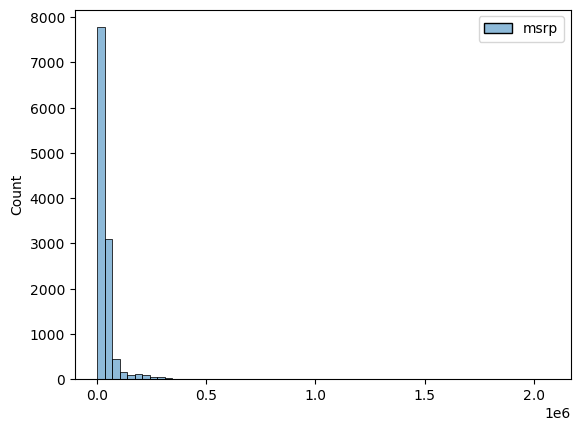

In [59]:
#histogram plot using the data from the msrp column to understand the distribution of price
#we see long tail distribution
sns.histplot(df.msrp, bins = 60)


In [60]:
#applying log function since this won't help our model

np.log1p([0, 1, 10, 100, 10000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 9.21044037])

In [61]:
np.log([0+1, 1+1, 1+10, 1+100, 1+100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052, 11.51293546])

In [62]:
#apppplying log function to the msrp values
price_logs = np.log1p(df.msrp)

<AxesSubplot:ylabel='Count'>

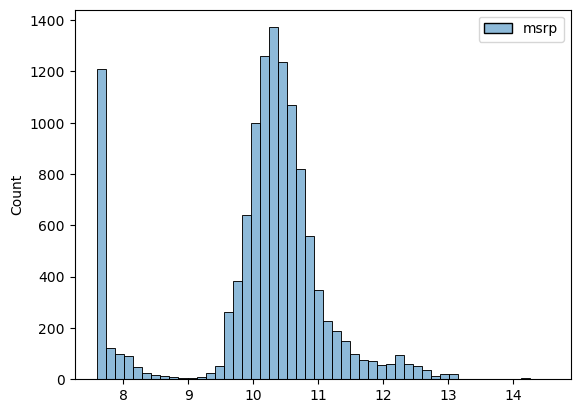

In [63]:
#we can see a more normally distributed data now 
sns.histplot(price_logs, bins = 50)